<a href="https://colab.research.google.com/github/niazangels/approaching-almost/blob/main/00_supervised_and_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised and Unsupervised Problems

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets, manifold

In [2]:
pixel_values, targets = datasets.fetch_openml(
    'mnist_784', version=1, return_X_y=True
)

In [3]:
pixel_values.shape, targets.shape

((70000, 784), (70000,))

In [4]:
targets.dtype

dtype('O')

In [5]:
targets[:5]

array(['5', '0', '4', '1', '9'], dtype=object)

In [6]:
targets = targets.astype(int)

In [7]:
targets[:5]

array([5, 0, 4, 1, 9])

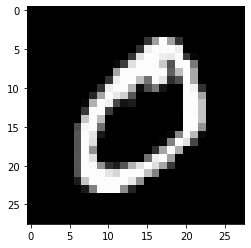

In [8]:
single_image = pixel_values[1, :].reshape(28,28)
plt.imshow(single_image, cmap='gray')

In [9]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000])

In [10]:
transformed_data.shape

(3000, 2)

In [11]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns = "x y targets".split()
)

In [12]:
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5.0
1,-26.105896,-68.069321,0.0
2,-42.503582,35.580391,4.0
3,38.893967,26.663395,1.0
4,-14.770573,35.433247,9.0


In [13]:
tsne_df['targets'] = tsne_df['targets'].astype(int)
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


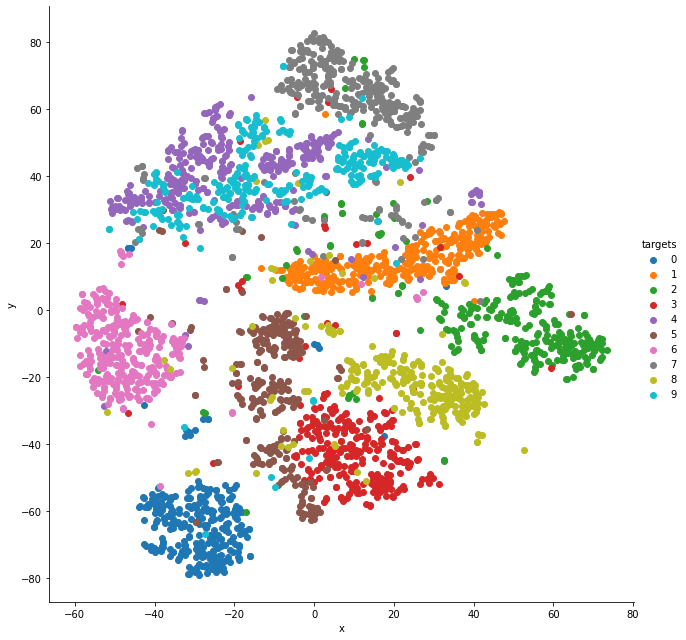

In [14]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=9)
grid.map(plt.scatter, "x", "y").add_legend()

# Cross Validation

In [15]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [17]:
quality_mapping = dict(zip(sorted(df['quality'].unique()), range(6)))
quality_mapping

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}

In [18]:
df["quality"] = df["quality"].map(quality_mapping)
df["quality"]

0       2
1       2
2       2
3       3
4       2
       ..
1594    2
1595    3
1596    3
1597    2
1598    3
Name: quality, Length: 1599, dtype: int64

In [19]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [20]:
df = df.sample(frac=1.).reset_index(drop=True)

In [21]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.5,0.360,0.47,2.2,0.074,9.0,23.0,0.99638,3.23,0.76,12.000000,3
1,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,3
2,7.6,0.630,0.03,2.0,0.080,27.0,43.0,0.99578,3.44,0.64,10.900000,3
3,7.2,0.360,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.000000,4
4,6.8,0.915,0.29,4.8,0.070,15.0,39.0,0.99577,3.53,0.54,11.100000,2


In [22]:
df.shape

(1599, 12)

In [23]:
df_train = df.head(1000)
df_test = df.tail(599)

In [24]:
from sklearn import tree, metrics

In [25]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [26]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [27]:
df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [28]:
# Fit model
cols = df.columns[:-1]
clf.fit(
    df_train[cols],
    df_train['quality']
)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(y_pred=train_predictions, y_true=df_train['quality'])
test_accuracy = metrics.accuracy_score(y_pred=test_predictions, y_true=df_test['quality'])

train_accuracy, test_accuracy

(0.572, 0.5191986644407346)

## Calculate accuracies for different values of max_depth and plot it

In [30]:
import matplotlib
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [31]:
train_accuracies = [.5]
test_accuracies = [.5]

In [32]:
# Evaluate models

for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(df_train[cols], df_train['quality'])

    train_accuracy = metrics.accuracy_score(df_train['quality'], clf.predict(df_train[cols]))
    test_accuracy = metrics.accuracy_score(df_test['quality'], clf.predict(df_test[cols]))

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

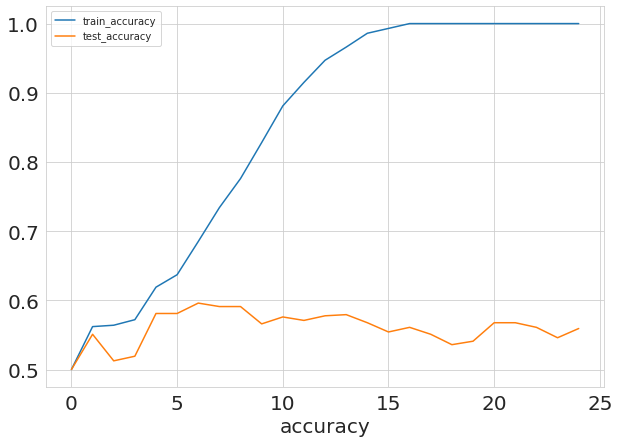

In [33]:
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

plt.plot(train_accuracies, label="train_accuracy")
plt.plot(test_accuracies, label="test_accuracy")

plt.legend(loc="upper left")

plt.xlabel("max_depth", size=20)
plt.xlabel("accuracy", size=20)

plt.show()

In [34]:
# Best accuracy

def argmax(L):
    return L.index(max(L))

# Note that these are indexes, so max_depth is this + 1
argmax(train_accuracies), argmax(test_accuracies)

(16, 6)

Types of cross validation
- k-fold cross-validation 
- stratified k-fold cross-validation 
-  hold-out based validation 
- leave-one-out cross-validation 
- group k-fold cross-validation

## k-fold cross validation

In [35]:
df_kfold = df.copy()

In [36]:
from sklearn import model_selection

In [37]:
# Fill
df['kfold'] = -1

# Shuffle
df_kfold = df.sample(frac=1).reset_index(drop=True)

kf = model_selection.KFold(n_splits=5)

for fold, (train, val) in enumerate(kf.split(X=df_kfold)):
    df_kfold.loc[val, 'kfold'] = fold

In [38]:
df_kfold.head()['kfold']

0    0
1    0
2    0
3    0
4    0
Name: kfold, dtype: int64

In [39]:
df_kfold.tail()['kfold']

1594    4
1595    4
1596    4
1597    4
1598    4
Name: kfold, dtype: int64

## Stratified k-fold
- Best for skewed datasets

In [40]:
# del df_stratified

In [41]:
df_strat = df.copy()
df_strat = df_strat.sample(frac=1.).reset_index(drop=True)

df_strat['kfold'] = -1

stratified_kf = model_selection.StratifiedKFold(n_splits=5)

for fold, (train, val) in enumerate(stratified_kf.split(X=df_strat, y=df_strat['quality'])):
    df_strat['kfold'] = fold


In [42]:
df_strat.head()['quality']

0    3
1    2
2    2
3    3
4    3
Name: quality, dtype: int64

In [43]:
df_strat.tail()['quality']

1594    2
1595    2
1596    2
1597    3
1598    2
Name: quality, dtype: int64

Text(0, 0.5, 'count')

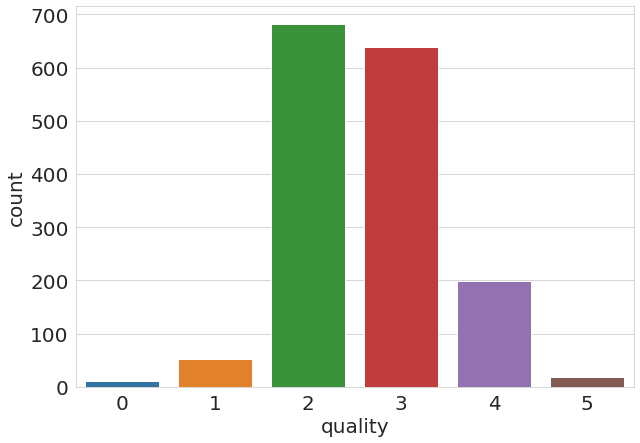

In [44]:
# Plot counts
plt.figure(figsize=(10,7))
sns.countplot(x='quality', data=df_strat)
plt.xlabel('quality', fontsize=20)
plt.ylabel('count', fontsize=20)

In many cases, we have to deal with **small datasets** and creating big validation sets 
means losing a lot of data for the model to learn. In those cases, we can opt for a 
type of k-fold cross-validation where **k=N**, where N is the number of samples in the 
dataset. 

### Using cross validation in regression problems

We can use all the cross-validation techniques mentioned above for regression 
problems **except for stratified k-fold**. That is we cannot use stratified k-fold directly, 
but there are ways to change the problem a bit so that we can use stratified k-fold 
for regression problem

If using stratified kfold, if your samples > 10k, you can split into 10 or 20 bins. Otherwise, you can use Sturge's rule

In [45]:
import math

math.log(4, 2)

2.0

In [46]:
def sturge_rule(samples):
    return 1 + np.log2(samples)

In [47]:
# np.arange(1, 10_000, 10)

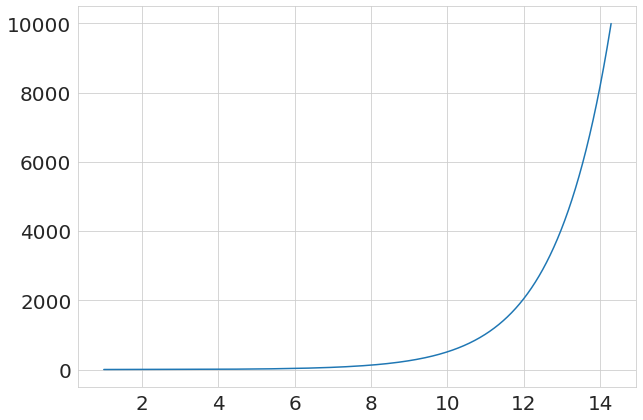

In [48]:
plt.figure(figsize=(10,7))
plt.plot(sturge_rule(np.arange(1, 10_000, 10)),np.arange(1, 10_000, 10), )

### Stratified split with a sample regression dataset

In [49]:
from sklearn import datasets, model_selection

In [50]:
X, y = datasets.make_regression(n_samples=15_000, n_features=100, n_targets=1)

In [53]:
int(sturge_rule(len(X)))

14

In [59]:
pd.cut(pd.DataFrame(np.arange(100))[0], bins=10, labels=False)

0     0
1     0
2     0
3     0
4     0
     ..
95    9
96    9
97    9
98    9
99    9
Name: 0, Length: 100, dtype: int64

In [67]:
def create_folds(data):
    data['kfold'] = -1
    data = data.sample(frac=1).reset_index(drop=True)
    num_bins = int(sturge_rule(len(data)))

    data["bins"] = pd.cut(data['target'], bins=num_bins, labels=False)
    
    kf = model_selection.StratifiedKFold(n_splits=5, )

    for fold, (train, val) in enumerate(kf.split(X=data, y=data['bins'].values)):
        data.loc[val, 'kfold'] = fold

    data.drop('bins', axis=1, inplace=True)
    return data

# Body
X, y = datasets.make_regression(n_samples=150_000, n_features=100, n_targets=1)
df = pd.DataFrame(X)
df['target'] = y
df = create_folds(df)

In [68]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,target,kfold
0,0.919828,0.300015,0.048362,2.763935,-0.379055,0.606742,0.614094,0.427921,-1.214871,0.356740,0.338281,0.011740,0.341268,-0.840399,1.783500,-0.761827,-0.040918,-1.046661,-0.084155,-0.120574,-0.108429,1.998213,-0.884942,-0.182900,-0.031663,0.786872,-0.406582,-0.432917,-0.040509,0.654096,0.655662,-0.663504,-0.134193,0.115420,0.255588,1.291601,1.179144,0.224716,-0.051168,0.354292,...,-0.429633,0.269157,1.439442,0.060085,-1.403816,1.652282,0.280938,-1.432528,-0.452320,1.184581,1.060523,-0.387834,-1.656883,0.714925,1.233845,-0.302524,1.402160,-0.220485,-0.370113,-0.570453,1.189057,0.283268,-0.957661,-0.107131,-0.125455,-1.091381,-1.069686,0.365290,-0.399678,0.274768,1.173469,0.058086,0.948472,0.500531,0.497142,-1.684597,0.362345,-0.451069,-212.099347,0
1,0.019964,-0.481246,1.172526,-0.992944,-1.538181,0.811772,1.079590,-0.247513,0.947057,-0.939571,0.973586,-0.712094,-2.577105,0.125996,-1.968370,-0.681407,-0.494812,-0.114836,0.008152,-0.785491,0.126453,0.896049,-1.040121,1.146112,1.281930,-1.253386,-0.875900,-1.291195,1.929011,1.989551,-1.415060,1.065765,0.419620,-1.903436,0.329650,0.226360,-1.272033,-1.267028,-0.198156,-0.171023,...,-0.896937,-0.936419,0.040999,-1.155707,0.719403,0.883209,0.494590,-0.987475,-0.156562,-0.302900,0.400824,0.457059,-0.800609,0.144029,0.082412,-1.084986,0.679581,-0.377660,1.087136,0.345414,-0.368759,-0.089297,-0.368865,0.053875,1.285359,0.046499,0.806039,-2.380518,-0.689129,0.504701,0.419483,0.497006,0.295690,0.121670,0.512540,0.309631,-0.379204,0.084792,-107.265710,0
2,0.865797,-1.343915,1.140324,1.138575,1.428003,-0.765716,-0.582303,-1.342127,0.041908,0.507741,1.445131,-1.590236,-0.643195,-1.272339,-0.483282,0.486606,1.814880,0.459605,0.511996,-0.664768,0.225401,-1.133643,-0.019450,-1.450998,-1.149622,0.517312,0.230450,1.651383,2.343943,-0.678859,-1.151385,0.725653,-0.765523,-0.761579,0.596142,-1.741541,1.526436,0.944765,-1.715066,-2.316492,...,-0.348341,-0.260167,-0.341800,-0.135654,-0.973623,0.586943,0.483987,-0.914898,2.070152,0.691510,0.024962,1.496586,-1.862469,1.141520,1.541419,0.030718,0.000858,1.253932,1.136042,0.535097,-1.374234,1.675737,0.683966,-0.159860,0.623829,0.942050,0.550141,-0.093512,2.115945,-1.413247,-0.214724,0.424796,0.011380,-0.267272,-0.140139,1.527550,-0.659070,0.067774,55.466960,0
3,-1.794519,-1.047698,-0.545832,-0.644537,-0.782273,-0.795186,-0.600455,-1.204502,1.664150,-0.027708,-0.961802,2.654881,1.122150,0.169631,1.241355,0.977231,-1.116084,0.192609,0.306430,0.661553,2.149967,-0.952318,0.234161,1.986212,1.385753,1.904612,-0.643274,-1.491004,-0.349354,1.105160,0.251720,1.154856,-0.714843,-1.300630,0.436735,-0.808368,-0.474111,-0.987518,-0.035170,0.021072,...,1.229002,0.627872,2.244679,1.105321,0.097543,-0.193326,-0.035723,2.050296,1.249485,0.819174,0.321889,-0.262871,0.683263,-0.812574,0.743332,-0.100289,0.299770,-0.235127,-1.081901,1.016174,-0.062704,-0.889490,1.472747,-0.419567,0.578437,-0.469692,-1.321426,-0.443848,0.337763,0.686534,1.079857,1.500799,0.498398,0.324255,-0.708524,-0.508512,0.882207,0.672056,148.145468,0
4,-0.461982,0.724045,-1.898327,0.064194,1.257753,-1.405789,1.381035,0.508476,0.695158,-1.403520,1.639334,-0.812774,0.744021,0.839353,-1.877401,-1.962943,0.468519,-0.054091,1.667093,-1.278770,-0.668121,-1.173430,1.595890,-0.375237,0.022920,-0.145463,-1.014632,-0.942461,0.606240,-0.753172,-0.277989,-0.706759,-1.519835,0.652837,2.517464,0.443863,-0.965057,-0.573255,-0.584151,0.514000,...,-0.058870,0.315167,0.281719,-0.026075,-0.284435,-0.388729,0.267273,-0.872422,-0.093078,-0.504427,-1.674556,0.183234,-0.401459,-1.647789,0.142317,-0.825596,0.112334,-0.735338,-0.076230,0.436600,-0.266018,1.178307,0.209006,-0.391799,-1.672039,-1.544120,-0.277392,-0.089770,0.191309,1.223749,0.568744,-0.954193,1.245018,-2.316983,-0.847576,1.04

In [71]:
df['kfold'].value_counts()

4    30000
3    30000
2    30000
1    30000
0    30000
Name: kfold, dtype: int64

# Evaluation Metrics

Classification:
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply
AUC (AUC)
- Log loss
- Precision at k (P@k)
- Average precision at k (AP@k)
- Mean average precision at k (MAP@k)

Regression:
- Mean absolute error (MAE)
- Mean squared error (MSE)
- Root mean squared error (RMSE)
- Root mean squared logarithmic error (RMSLE)
- Mean percentage error (MPE)
- Mean absolute percentage error (MAPE)
- R2

When we have an **equal number of samples** in a **binary classification** metric, we generally use **accuracy, precision, recall and f1.**

If skewed, use **precision** and other metrics

In [73]:
?? metrics.accuracy_score

## Precision recall curve

Most of the models predict a probability, and when we predict, **we usually choose this threshold to be 0.5** . This threshold is not always ideal, and **depending on this threshold, your value of precision and recall can change drastically**. If for every
threshold we choose, we calculate the precision and recall values, we can create a
plot between these sets of values. This plot or curve is known as the precision-recall
curve.

In [77]:
y_true = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])
y_pred = np.array([0.02638412, 0.11114267, 0.31620708, 
                   0.0490937, 0.0191491, 0.17554844, 
                   0.15952202, 0.03819563, 0.11639273, 
                   0.079377, 0.08584789, 0.39095342, 
                   0.27259048, 0.03447096, 0.04644807, 
                   0.03543574, 0.18521942, 0.05934905, 
                   0.61977213, 0.33056815])


assert len(y_true) == len(y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


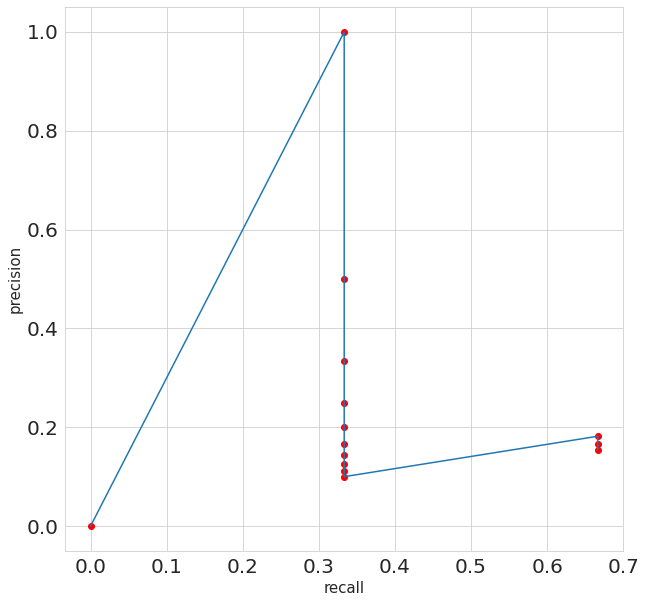

In [85]:
precisions, recalls = [], []

thresholds = [0.0490937 , 0.05934905, 0.079377,
            0.08584789, 0.11114267, 0.11639273,
            0.15952202, 0.17554844, 0.18521942,
            0.27259048, 0.31620708, 0.33056815,
            0.39095342, 0.61977213]


for t in thresholds:
    preds = (y_pred > t).astype(int)
    p = metrics.precision_score(y_true=y_true, y_pred=preds)
    r = metrics.recall_score(y_true=y_true, y_pred=preds)
    precisions.append(p)
    recalls.append(r)

# Plot
plt.figure(figsize=(10,10))
plt.plot(recalls, precisions)
plt.scatter(recalls, precisions, c='r')
plt.xlabel('recall', fontsize=15)
plt.ylabel('precision',  fontsize=15)
plt.show()

### F1 Score
F1 = 2PR / (P + R)

### TPR (Sensitivity / Recall)



TPR = TP / (TP + FN)

### FPR 
FPR = FP / (TN + FP)

### 1 - FPR (Specificity / TNR / True Negative Rate )

### What does AUC say about our model?

Suppose you get an AUC of 0.85 when you build a model to detect pneumothorax
from chest x-ray images. This means that if you select a random image from your
dataset with pneumothorax (positive sample) and another random image without
pneumothorax (negative sample), then the pneumothorax image will rank higher
than a non-pneumothorax image with a probability of 0.85.

### Log loss

`log_loss = - 1.0 * ( target * log(pred) + (1 - target) * log(1 - pred))`

Where target is either 0 or 1 and prediction is a probability of a sample belonging
to class 1.

Log loss punishes you for being very sure and very wrong.